# TimeCourse
The `pycopi.TimeCourse` class enables a user to run an COPASI model deterministically. Future versions of PyCoTools will implement the alternative sovlers that COPASI offers and they will be accessible via a keyword argument, but presently these features are not implemented. 

## Get model Path
PyCoTools works with directories to copasi files so first we need to get the location of the example model on disk

In [3]:
%matplotlib inline
import os,glob

for i in glob.glob('*.cps'):
    kholodenko_model= os.path.abspath(i)
    
print kholodenko_model
print os.path.isfile(kholodenko_model)

/home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
True


To run deterministic time course with kholodenko model we have a few options. We can:
    1. Collect all copasi output as tab separated file using the `report_name` keyword.

In [4]:
import site
site.addsitedir('/home/b3053674/Documents/PyCoTools')
import PyCoTools
import os
import pandas
TC= PyCoTools.pycopi.TimeCourse(kholodenko_model,
                        report_name='kholodenko_timecourse_report.txt',
                        ## Intervals*StepSize must equal End
                        end=1000,    
                        intervals=50,
                        step_size=20)

## check its worked
print os.path.isfile(TC.kwargs['report_name'])
print pandas.read_csv(TC.kwargs['report_name'],sep='\t').head()

os.system('CopasiUI {}'.format(kholodenko_model))

DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:1135:CopasiML: <Element {http://www.copasi.org/static/schema}COPASI at 0x7fbe542aaea8>
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:946:created a 'time_course' type report
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
DEBUG:PyCoTools.pycopi:pycopi:1406:getting report key
DEBUG:PyCoTools.pycopi:pycopi:1448:setting up deterministic time course
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documen

0

    2. Collect results only for selected model variables only by passing a list to the `metabolites` keyword. When no argument is specified, all model variables are selected by default:

In [7]:
import pandas,os
import PyCoTools
TC=PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            report_name='kholodenko_timecourse_report.txt',
                            end=1000,
                            intervals=50,
                            step_size=20,
                            metabolites=['Mek1-P','Mek1'],
                            global_quantities = [])

##check that we only have two variables
print pandas.read_csv(TC.kwargs['report_name'],sep='\t').head()

DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:1135:CopasiML: <Element {http://www.copasi.org/static/schema}COPASI at 0x7fbe5422c8c0>
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:946:created a 'time_course' type report
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
DEBUG:PyCoTools.pycopi:pycopi:1406:getting report key
DEBUG:PyCoTools.pycopi:pycopi:1448:setting up deterministic time course
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documen

    3. plot and save results in the same directory as the model file

DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:1135:CopasiML: <Element {http://www.copasi.org/static/schema}COPASI at 0x7fbe54289cf8>
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:946:created a 'time_course' type report
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
DEBUG:PyCoTools.pycopi:pycopi:1406:getting report key
DEBUG:PyCoTools.pycopi:pycopi:1448:setting up deterministic time course
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documen

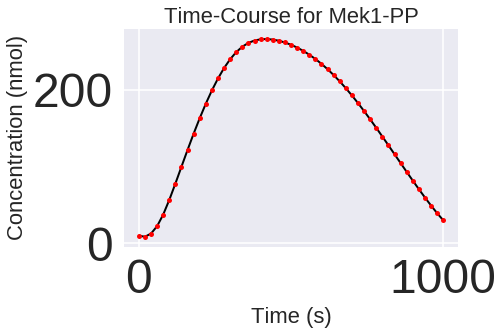

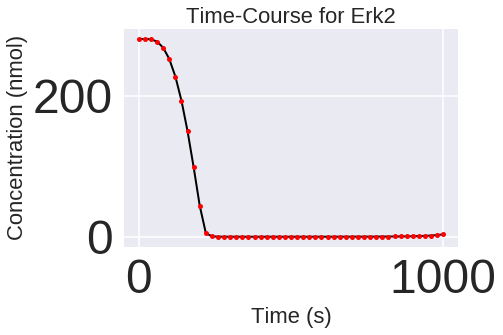

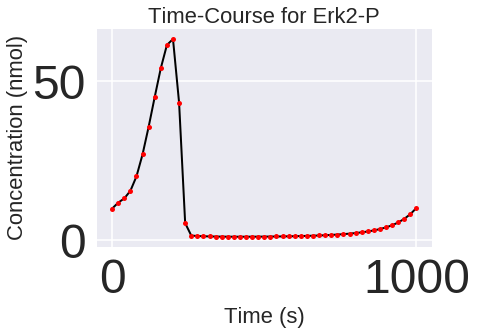

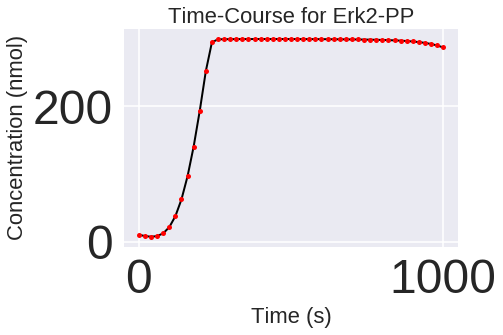

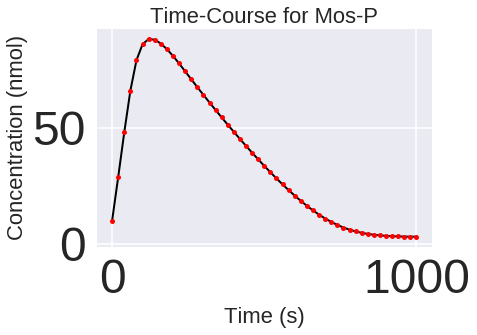

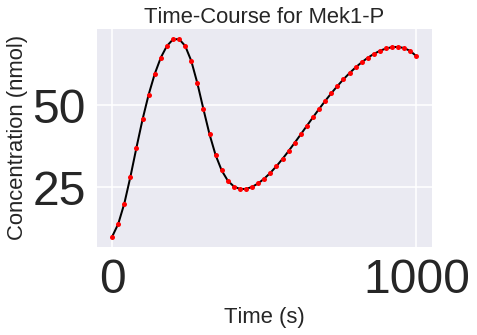

In [9]:
import PyCoTools,glob,os

TC = PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            report_name='kholodenko_timecourse_report.txt',
                            end=1000,
                            intervals=50,
                            step_size=20,
                            plot=True,
                            savefig=True)

## check png files exist
for i in glob.glob('./TimeCourseGraphs/*'):
    print 'File {} exists: \t {}'.format(i,os.path.isfile(i))
    

You can also play around with graphics. Note that these arguments are simply passed on to matplotlib and therefore more documenation can be found [here](http://matplotlib.org/)

DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:1135:CopasiML: <Element {http://www.copasi.org/static/schema}COPASI at 0x7fbe51480a70>
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:108:copasi file Kholodenko.cps has been parsed into Python
DEBUG:PyCoTools.pycopi:pycopi:946:created a 'time_course' type report
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/Kholodenko.cps
DEBUG:PyCoTools.pycopi:pycopi:1406:getting report key
DEBUG:PyCoTools.pycopi:pycopi:1448:setting up deterministic time course
DEBUG:PyCoTools.pycopi:pycopi:119:model written to /home/b3053674/Documen

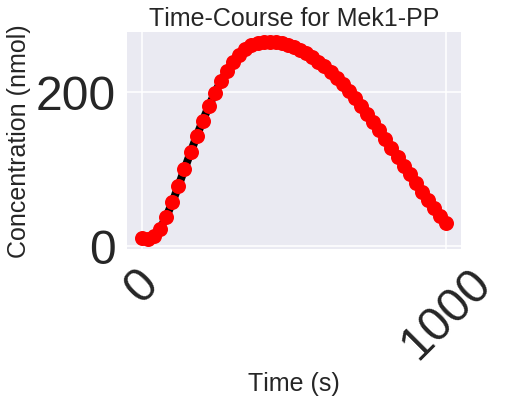

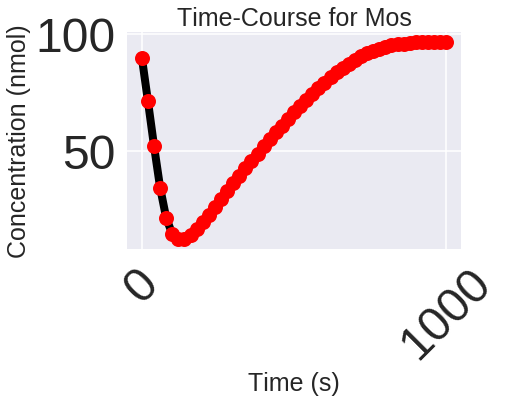

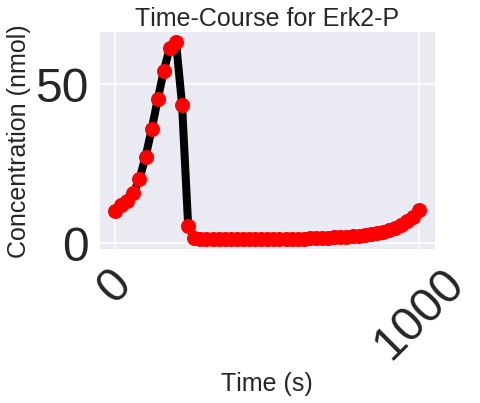

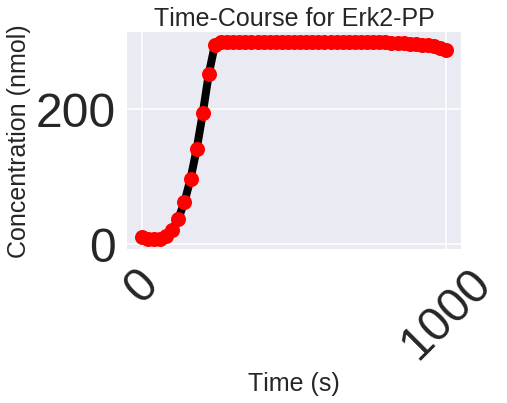

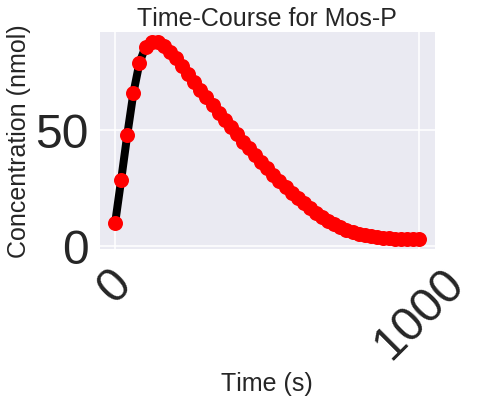

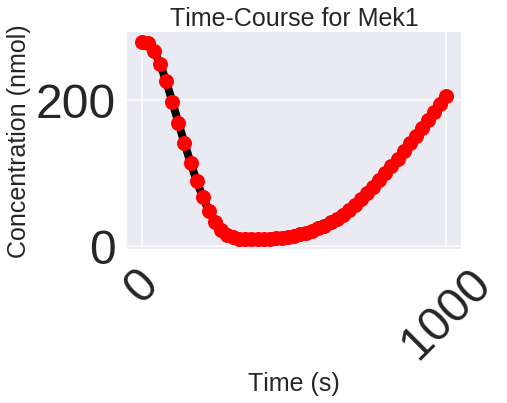

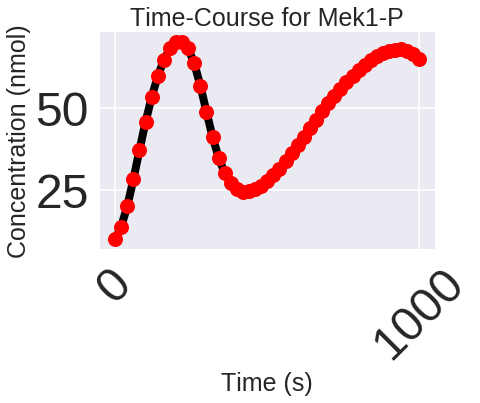

In [12]:
import os,PyCoTools
PyCoTools.pycopi.TimeCourse(kholodenko_model,
                            report_name='kholodenko_timecourse_report.txt',
                            end=1000,
                            intervals=50,
                            step_size=20,
                            plot=True,
                            savefig=True,
                            line_width=8,
                            marker_size=15,
                            axis_size=20,
                            font_size=25,
                            line_style='-',
                            xtick_rotation=45)

In [ ]:
PyCoTools.pycopi.TimeCourse(kholodenko_model, report_name='kholodenko_timecourse_report.txt',
                            end=1000, intervals=50, step_size=20, savefig=True)